In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from haversine import haversine
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
UberData = pd.read_csv('/content/drive/MyDrive/ML Assignments/41149_B1/uber.csv')
UberData.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [63]:
UberDataCopy = UberData.copy()
UberDataCopy.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [64]:
UberDataCopy.shape

(200000, 9)

In [65]:
UberDataCopy.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [66]:
UberDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [67]:
UberDataCopy.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [68]:
UberDataCopy.dropna(inplace = True)
UberDataCopy.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [69]:
UberDataCopy.shape

(199999, 9)

In [70]:
UberDataCopy.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
UberDataCopy.head()

,ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


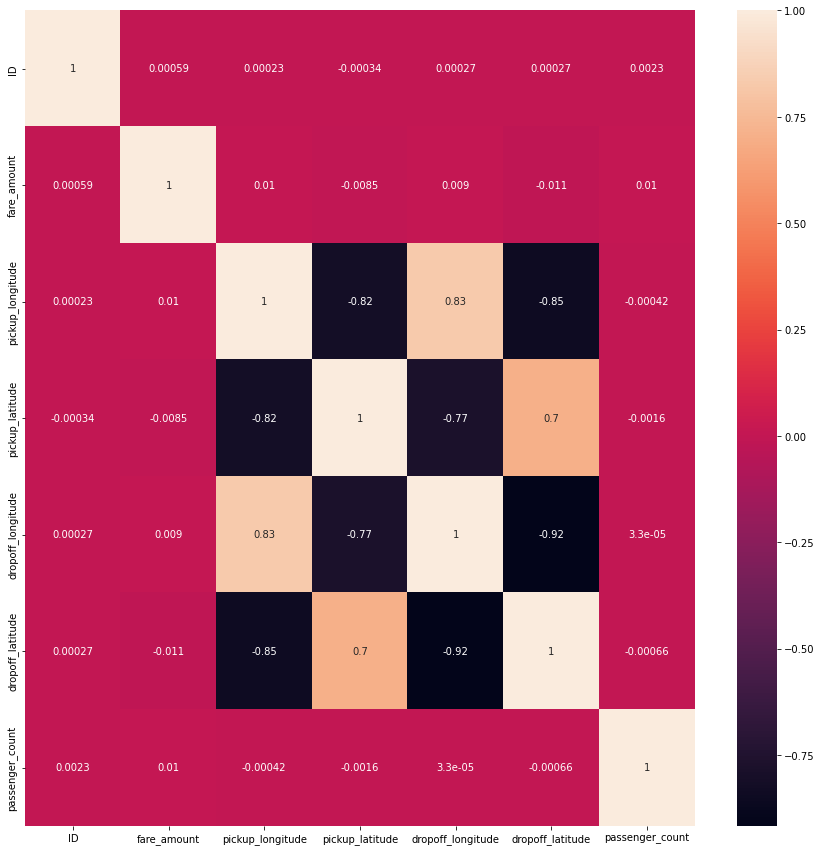

In [71]:
corrMat = UberDataCopy.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrMat, annot = True)

In [72]:
UberDataCopy['pickup_datetime'] = pd.to_datetime(UberDataCopy['pickup_datetime'])

In [73]:
UberDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ID                 199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [74]:
UberDataCopy['minute'] = UberDataCopy['pickup_datetime'].apply(lambda x : x.minute)
UberDataCopy['hour'] = UberDataCopy['pickup_datetime'].apply(lambda x : x.hour)
UberDataCopy['day'] = UberDataCopy['pickup_datetime'].apply(lambda x : x.day)
UberDataCopy['weekday'] = UberDataCopy['pickup_datetime'].apply(lambda x : x.weekday())
UberDataCopy['month'] = UberDataCopy['pickup_datetime'].apply(lambda x : x.month)
UberDataCopy['year'] = UberDataCopy['pickup_datetime'].apply(lambda x : x.year)
UberDataCopy.head()

,ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,minute,hour,day,weekday,month,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,52,19,7,3,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,20,17,4,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,45,21,24,0,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,22,8,26,4,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,47,17,28,3,8,2014


In [75]:
UberDataCopy.drop(['ID', 'key', 'pickup_datetime'], axis = 1, inplace = True)
UberDataCopy.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,minute,hour,day,weekday,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,52,19,7,3,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,20,17,4,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,45,21,24,0,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,22,8,26,4,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,47,17,28,3,8,2014


In [76]:
UberDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   minute             199999 non-null  int64  
 7   hour               199999 non-null  int64  
 8   day                199999 non-null  int64  
 9   weekday            199999 non-null  int64  
 10  month              199999 non-null  int64  
 11  year               199999 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 19.8 MB


In [77]:
UberDataCopy = UberDataCopy[UberDataCopy['fare_amount'] > 0]

In [78]:
UberDataCopy = UberDataCopy[(UberDataCopy.pickup_latitude<90) & (UberDataCopy.dropoff_latitude<90) &
        (UberDataCopy.pickup_latitude>-90) & (UberDataCopy.dropoff_latitude>-90) &
        (UberDataCopy.pickup_longitude<180) & (UberDataCopy.dropoff_longitude<180) &
        (UberDataCopy.pickup_longitude>-180) & (UberDataCopy.dropoff_longitude>-180)]
UberDataCopy.shape

(199965, 12)

In [80]:
distance = []
for i in UberDataCopy.index:
  distance.append(haversine((UberDataCopy['pickup_latitude'][i], UberDataCopy['pickup_longitude'][i]), (UberDataCopy['dropoff_latitude'][i], UberDataCopy['dropoff_longitude'][i])))
UberDataCopy['distance (km)'] = pd.Series(distance)
UberDataCopy.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,minute,hour,day,weekday,month,year,distance (km)
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,52,19,7,3,5,2015,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,20,17,4,7,2009,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,45,21,24,0,8,2009,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,22,8,26,4,6,2009,1.661686
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,47,17,28,3,8,2014,4.475456


In [93]:
UberDataCopy.isna().sum()

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
minute                0
hour                  0
day                   0
weekday               0
month                 0
year                  0
distance (km)        28
dtype: int64

In [94]:
UberDataCopy['distance (km)'].fillna(UberDataCopy['distance (km)'].mean(), inplace = True)
UberDataCopy.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
minute               0
hour                 0
day                  0
weekday              0
month                0
year                 0
distance (km)        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


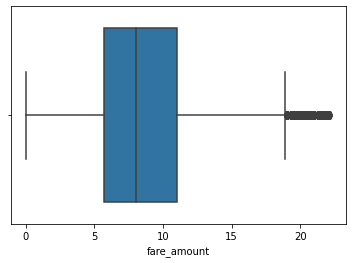

In [95]:
sns.boxplot('fare_amount', data = UberDataCopy)

In [96]:
Q1 = UberDataCopy['fare_amount'].quantile(0.25)
Q3 = UberDataCopy['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:', IQR)
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
print('Lower Bound:', lowerBound)
print('Upper Bound:', upperBound)

IQR: 5.3
Lower Bound: -2.249999999999999
Upper Bound: 18.95


In [97]:
UberDataCopy[(UberDataCopy['fare_amount'] < lowerBound) | (UberDataCopy['fare_amount'] > upperBound)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,minute,hour,day,weekday,month,year,distance (km)
63,20.0,-73.977453,40.785215,-73.985950,40.734955,1,21,20,19,5,10,2013,5.634300
71,21.0,-73.954315,40.769703,-73.990135,40.757439,1,56,14,17,6,5,2015,3.310688
74,19.3,-74.013173,40.704148,-73.984285,40.754962,1,31,9,11,2,3,2009,6.152304
182,22.0,-73.983363,40.744282,-73.973965,40.795451,1,53,18,30,2,1,2013,5.744520
192,19.7,-73.963411,40.798469,-74.000779,40.729345,1,54,13,13,6,5,2012,8.305590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199683,20.1,-73.917655,40.771112,-73.958235,40.810820,5,47,8,7,3,6,2012,3.343082
199707,19.0,-73.955792,40.776717,-73.990815,40.756265,5,0,13,23,1,12,2014,1.818884
199746,19.3,-73.971775,40.752417,-73.892398,40.740870,1,0,16,10,6,7,2011,2.643518
199784,19.5,-73.979673,40.675340,-73.911750,40.683028,1,25,3,12,5,10,2013,3.274284


In [98]:
print('Old Dimensions:', UberDataCopy.shape)
UberDataCopy = UberDataCopy[(UberDataCopy['fare_amount'] >= lowerBound) & (UberDataCopy['fare_amount'] <= upperBound)]
print('New Dimensions:', UberDataCopy.shape)

Old Dimensions: (182811, 13)
New Dimensions: (177089, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


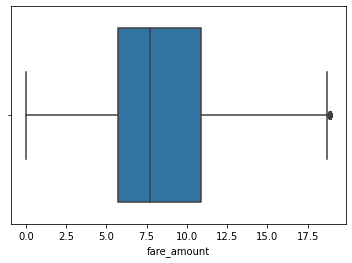

In [99]:
sns.boxplot('fare_amount', data = UberDataCopy)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


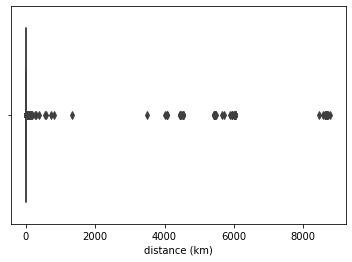

In [113]:
sns.boxplot(UberDataCopy['distance (km)'])

In [114]:
Q1 = UberDataCopy['distance (km)'].quantile(0.25)
Q3 = UberDataCopy['distance (km)'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:', IQR)
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
print('Lower Bound:', lowerBound)
print('Upper Bound:', upperBound)

IQR: 2.6422488706352496
Lower Bound: -2.7498317535290626
Upper Bound: 7.819163729011936


In [115]:
UberDataCopy[(UberDataCopy['distance (km)'] < lowerBound) | (UberDataCopy['distance (km)'] > upperBound)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,minute,hour,day,weekday,month,year,distance (km)
346,15.5,0.000000,0.000000,-73.979805,40.786030,1,15,19,5,3,3,2015,8666.409982
505,16.5,-73.874958,40.774058,-73.812540,40.713205,1,42,15,28,1,2,2012,8.569564
583,13.7,-73.972258,40.761745,-73.751885,40.719627,4,26,16,12,6,9,2010,19.147835
970,18.5,-73.959160,40.763280,-73.861502,40.768217,1,17,4,23,4,4,2010,8.242818
1108,15.7,-73.990040,40.757373,-73.939628,40.818608,5,56,5,18,4,3,2011,8.023449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,42,14,31,4,1,2014,20.513641
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,49,10,28,6,10,2012,20.513641
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,9,1,14,4,3,2014,20.513641
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,56,14,20,2,5,2015,20.513641


In [116]:
print('Old Dimensions:', UberDataCopy.shape)
UberDataCopy = UberDataCopy[(UberDataCopy['distance (km)'] >= lowerBound) & (UberDataCopy['distance (km)'] <= upperBound)]
print('New Dimensions:', UberDataCopy.shape)

Old Dimensions: (177089, 13)
New Dimensions: (162372, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


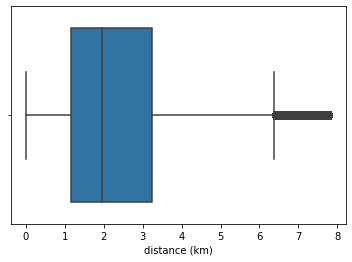

In [117]:
sns.boxplot(UberDataCopy['distance (km)'])

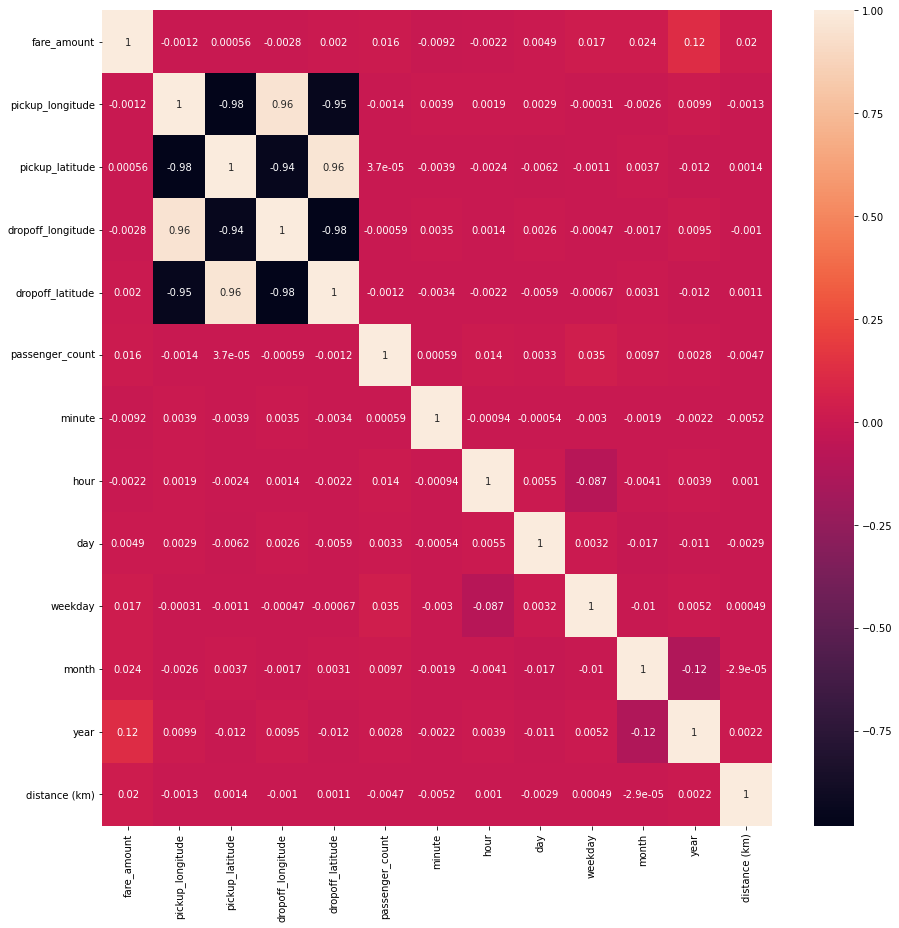

In [118]:
corrMat = UberDataCopy.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrMat, annot = True)

In [119]:
x = UberDataCopy.drop('fare_amount', axis = 1)
y = UberDataCopy['fare_amount']
print('X:', x.shape)
print('Y:', y.shape)

X: (162372, 12)
Y: (162372,)


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
print('X Train:', x_train.shape)
print('X Test:', x_test.shape)
print('Y Train:', y_train.shape)
print('Y Test:', y_test.shape)

X Train: (121779, 12)
X Test: (40593, 12)
Y Train: (121779,)
Y Test: (40593,)


In [121]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [122]:
pd.DataFrame(data = x_train, columns = UberDataCopy.drop('fare_amount', axis = 1).columns)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,minute,hour,day,weekday,month,year,distance (km)
0,-0.138974,0.136233,-0.139395,0.134583,-0.474703,-0.952539,0.374816,-1.694187,-1.564997,-0.947150,-0.906408,-0.821716
1,-0.142389,0.129418,-0.141517,0.130935,-0.474703,-0.894877,1.146816,-1.694187,-0.022978,-0.656954,-0.906408,1.273618
2,-0.140176,0.136139,-0.142178,0.132554,-0.474703,0.200698,1.455616,-0.311372,-1.564997,0.794030,-0.906408,-0.856500
3,-0.138746,0.134477,-0.137506,0.136231,-0.474703,-0.837215,-0.551583,0.264801,0.491028,-1.237347,-0.365903,0.237004
4,-0.142157,0.129366,-0.139053,0.133618,-0.474703,0.892641,0.529216,-0.426606,-0.536984,-1.527544,-0.365903,2.052749
...,...,...,...,...,...,...,...,...,...,...,...,...
121774,-0.140417,0.133703,-0.133730,0.136162,-0.474703,-0.491244,1.455616,1.186679,0.491028,-0.947150,-0.906408,-0.589169
121775,-0.138971,0.142407,-0.139166,0.140886,-0.474703,0.604332,0.683616,1.186679,-0.022978,-0.076560,1.255613,-0.954840
121776,-0.140600,0.132355,-0.141074,0.130775,0.921850,1.238612,0.374816,-0.657076,-1.564997,0.503833,-1.446913,1.881754
121777,-0.139673,0.131636,-0.137178,0.129750,0.223573,-1.529158,0.220417,-0.541841,1.005034,0.794030,-0.906408,-0.302092


In [123]:
LinRegModel = LinearRegression()
LinRegModel.fit(x_train, y_train)
y_pred = LinRegModel.predict(x_test)
pd.DataFrame({'Actual':y_test, 'Preds':y_pred})

,Actual,Preds
68418,14.0,9.212041
102630,7.7,8.141838
9104,5.4,7.882423
96529,18.0,8.722494
61663,6.5,8.087112
...,...,...
29898,14.0,8.729170
188842,7.0,9.095197
150968,15.0,9.013804
121558,7.7,8.010288


In [124]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2.9333081709657463
MSE: 13.137693237270602
MAE: 3.624595596376319
R2 Score: 0.016685616255684432


In [125]:
RandForestModel = RandomForestRegressor()
RandForestModel.fit(x_train, y_train)
y_pred = RandForestModel.predict(x_test)
pd.DataFrame({'Actual':y_test, 'Preds':y_pred})

,Actual,Preds
68418,14.0,10.3800
102630,7.7,7.0930
9104,5.4,5.2160
96529,18.0,16.9707
61663,6.5,8.1960
...,...,...
29898,14.0,15.6250
188842,7.0,5.5750
150968,15.0,14.5250
121558,7.7,8.6080


In [126]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 1.3423532086813
MSE: 3.618551588710369
MAE: 1.9022490869258866
R2 Score: 0.7291629693860189


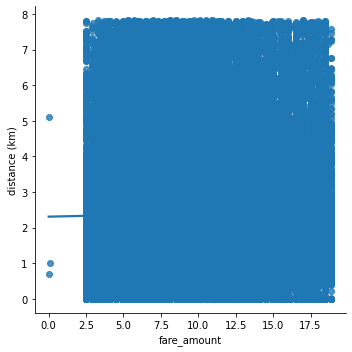

In [127]:
sns.lmplot(x = 'fare_amount', y = 'distance (km)', data = UberDataCopy)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


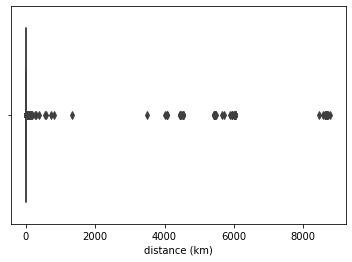